In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('preview.csv')
new_df = df[['league','home_team', 'away_team']]

# Pega o maior odd de cada partida e define a aposta

In [152]:
def check_result(row):
    game=(df['home_team']==row['home_team']) & (df['away_team']==row['away_team'])
    proba=list(df[game][['Home','Draw','Away']].values[0])
    max_proba=proba.index(max(proba))
    if max_proba == 0:
        result=list(df[game][['Home','odds_home']].values[0])
        result.append('Home')
    elif max_proba == 1:
        result = list(df[game][['Draw','odds_draw']].values[0])
        result.append('Draw')
    else:
        result = list(df[game][['Away','odds_away']].values[0])
        result.append('Away')
    return result

In [153]:
new_df[['proba','odds','aposta']]=new_df.apply(lambda row: check_result(row), axis=1,result_type="expand")
new_df.reset_index(drop=True,inplace=True)
new_df['ev']=new_df['odds']*new_df['proba']
new_df=new_df.loc[new_df['proba']>=0.55,:].reset_index(drop=True)

# Gera aleatoriamente distribuição de pesos para cada partida e busca escolha ótima entre retorno e risco

In [157]:
np.random.seed(42)
nsample=10000000
pfolio_returns = []
pfolio_volatilities = []
all_weights = np.zeros((nsample, new_df.shape[0]))
exp_return = np.zeros(nsample)
exp_risk = np.zeros(nsample)
riskreturn = np.zeros(nsample)
for i in range(nsample):
    weights = np.random.random(new_df.shape[0])
    weights = weights/np.sum(weights)
    
    all_weights[i,:] = weights #salva os pesos
    
    exp_return[i]= np.sum(weights * new_df['ev']) #Retorno
    exp_risk[i] = (np.sum(weights * new_df['odds']))**2 #Risco
    riskreturn[i]=exp_return[i]/exp_risk[i] #Retorno/Risco
    
    pfolio_returns.append(exp_return[i])
    pfolio_volatilities.append(exp_risk[i])
    
pfolio_returns=np.array(pfolio_returns)
pfolio_volatilities=np.array(pfolio_volatilities)

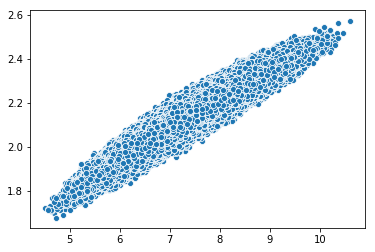

In [158]:
sns.scatterplot(x=pfolio_volatilities,y=pfolio_returns)

# Simula valor de aposta para cada jogo apostando 100 reais

In [159]:
index=riskreturn.argmax()
new_df['pesos']=all_weights[index]
new_df['valores']=new_df['pesos']*100
new_df

,league,home_team,away_team,proba,odds,aposta,ev,pesos,valores
0,Premier League,Brighton & Hove Albion,Newcastle United,0.893563,1.93,Home,1.724576,0.038881,3.888110
1,Premier League,Sheffield United,Everton,0.900733,2.17,Home,1.954591,0.049059,4.905926
2,Premier League,Wolverhampton Wanderers,Crystal Palace,0.899561,1.49,Home,1.340346,0.047558,4.755790
3,Premier League,Watford,Manchester City,0.824615,1.30,Away,1.071999,0.008351,0.835139
4,Premier League,Manchester United,West Ham United,0.919998,1.26,Home,1.159198,0.048009,4.800902
5,Premier League,Liverpool,Chelsea,0.906347,2.01,Home,1.821757,0.004950,0.495014
6,Championship,Stoke City,Brentford,0.819582,5.59,Home,4.581465,0.015556,1.555615
7,Championship,Swansea City,Bristol City,0.793821,1.85,Home,1.468568,0.046494,4.649355
8,La Liga,Granada CF,Athletic Club Bilbao,0.580954,2.05,Home,1.190956,0.019891,1.989077
9,La Liga,CA Osasuna,RCD Mallorca,0.553057,4.26,Away,2.356024,0.007297,0.729710
